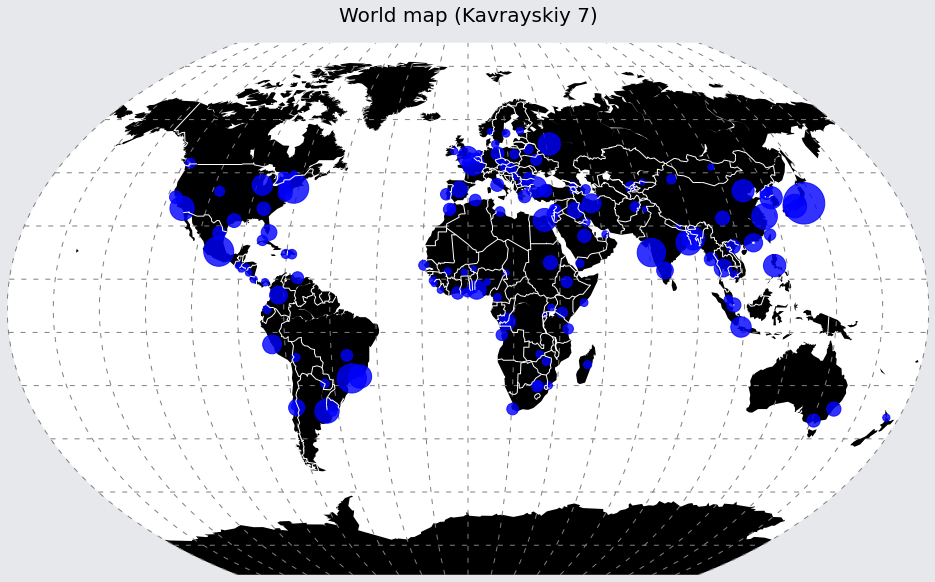

In [6]:
# a simple interface to maps and integration with matplotlib

# reference : http://maxberggren.github.io/2015/08/04/basemap/

# We will need to download and place accordingly some earth data (population places):
# information about earth data: 
# http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/


# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

# for projection we use Kavrayskiy 7 (kav7)
# Basemap supports 34 different projections so you will probably be able to find something that suits us
m = Basemap(resolution='c', projection='kav7', 
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0

n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'

fig1 = plt.figure(figsize=(16,20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

m.drawmapboundary(color='white',  linewidth=0.0,  fill_color='white')
m.drawparallels(parallels, linewidth=lw, dashes=dashes, color=graticules_color)
m.drawmeridians(meridians, linewidth=lw, dashes=dashes, color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', lake_color='white')
m.drawcountries(linewidth=1, linestyle='solid', color='white', zorder=30)

title = plt.title('World map (Kavrayskiy 7)', fontsize=20) 
title.set_y(1.03) # Move the title a bit for nicen


# information about earth data: 
# http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/

m.readshapefile('/Users/charilaostsarouchas/my_ds_corner/data/ne_110m_populated_places/ne_110m_populated_places', 
                name='populated_places', 
                drawbounds=False, 
                color='none')

populations = [r['POP2000'] for r in m.populated_places_info]
lats = [r['LATITUDE'] for r in m.populated_places_info]
lons = [r['LONGITUDE'] for r in m.populated_places_info]
x1, y1 = m(lons, lats) # Convert coords to projected place in figure
m.scatter(x1, y1, s=np.array(populations)*0.05, marker="o", color='blue', zorder=10, alpha=0.8)
